In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, roc_curve, auc, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from typing import List, Dict
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mstats
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

#from xgboost import XGBClassifier

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# %cd /content/drive/MyDrive/DL-1



In [ ]:
train_url = 'https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/train.csv'
test_url = 'https://raw.githubusercontent.com/odedovadia/AdvancedMLDLCourse/main/Assignments/Assignment%20I/test.csv'
df = pd.read_csv(train_url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8164 entries, 0 to 8163
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
 9   pollution   8164 non-null   float64
 10  sunlight    8164 non-null   float64
 11  traffic     8164 non-null   float64
 12  count       8164 non-null   int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 829.3+ KB


We can clearly see that our data doesnt have missing values, no categorial values (all converted to numbers) and one object datetime that we should convert

Now lets break down the date and time into different components in order to analyze trends/seasonal patterns and more of that.

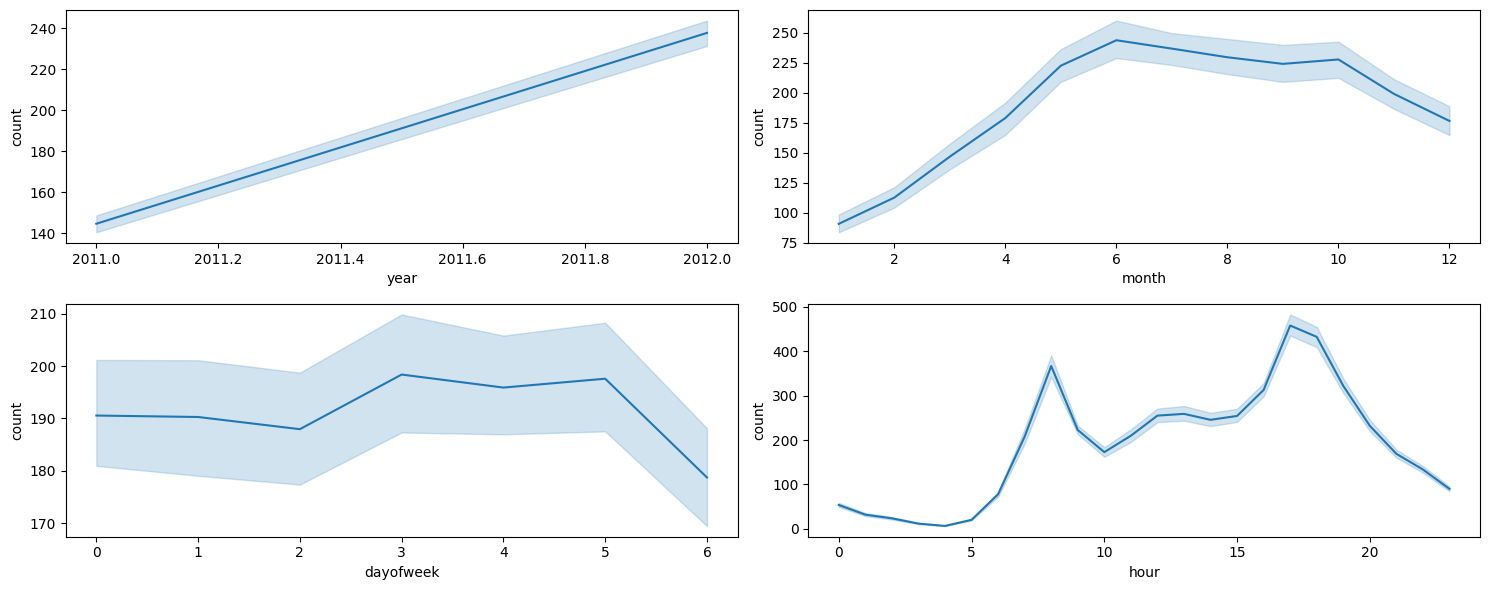

In [ ]:


# Assuming df is your DataFrame and 'datetime' is the column
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

# Plotting trends over time
plt.figure(figsize=(15, 6))
plt.subplot(2, 2, 1)
sns.lineplot(x='year', y='count', data=df)
plt.subplot(2, 2, 2)
sns.lineplot(x='month', y='count', data=df)
plt.subplot(2, 2, 3)
sns.lineplot(x='dayofweek', y='count', data=df)
plt.subplot(2, 2, 4)
sns.lineplot(x='hour', y='count', data=df)
plt.tight_layout()
plt.show()


Now lets check in different weathers the bike rental count

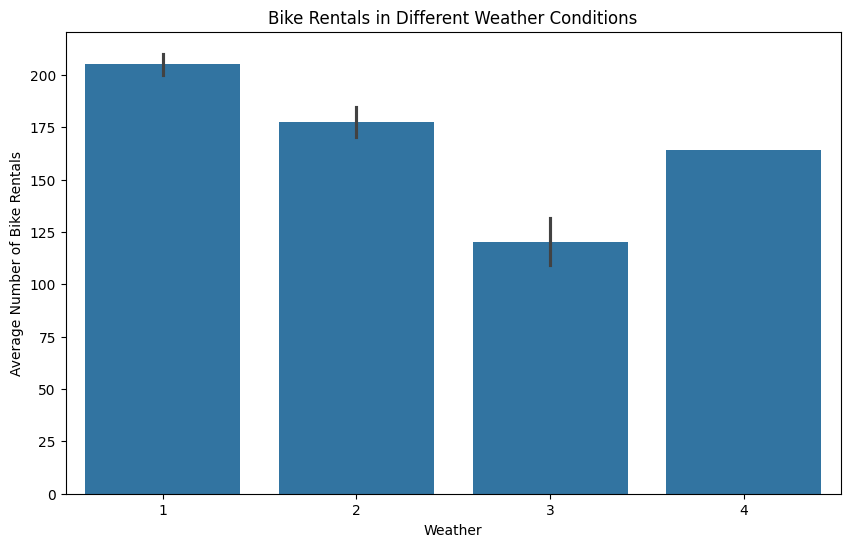

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=df)
plt.title('Bike Rentals in Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Average Number of Bike Rentals')
plt.show()


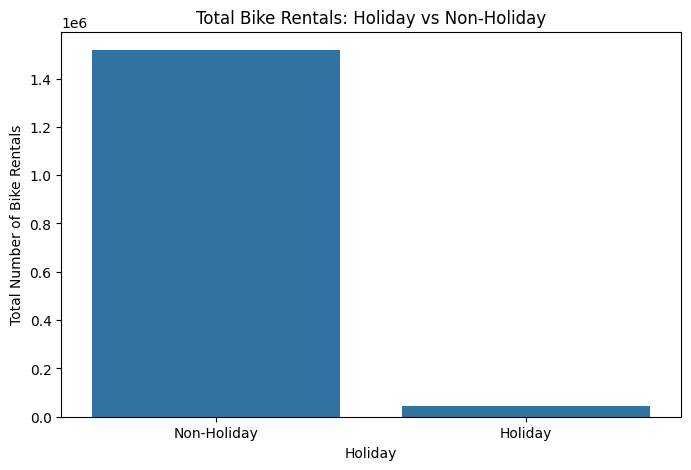

holiday
0    1517865
1      44233
Name: count, dtype: int64


In [ ]:


def plot_total_holiday_rental_counts(df, holiday_col='holiday', count_col='count'):
    """
    Plots the total bike rental counts for holidays vs non-holidays.

    :param df: DataFrame containing the bike rental data.
    :param holiday_col: Name of the column indicating holidays.
    :param count_col: Name of the column indicating the count of bike rentals.
    """
    total_counts = df.groupby(holiday_col)[count_col].sum().reset_index()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=holiday_col, y=count_col, data=total_counts)
    plt.title('Total Bike Rentals: Holiday vs Non-Holiday')
    plt.xlabel('Holiday')
    plt.ylabel('Total Number of Bike Rentals')
    plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
    plt.show()

plot_total_holiday_rental_counts(df)
total_rentals_by_holiday = df.groupby('holiday')['count'].sum()
print(total_rentals_by_holiday)



since there are more non holiday days in the year than holiday it does not make sense to take the count so lets try and see the average per day for each one

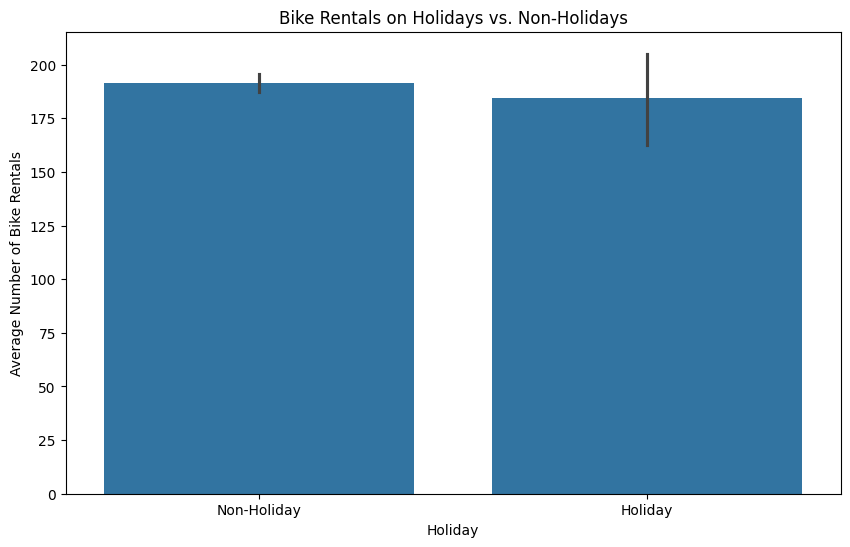

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='count', data=df)
plt.title('Bike Rentals on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Average Number of Bike Rentals')
plt.show()


Correlation Analysis


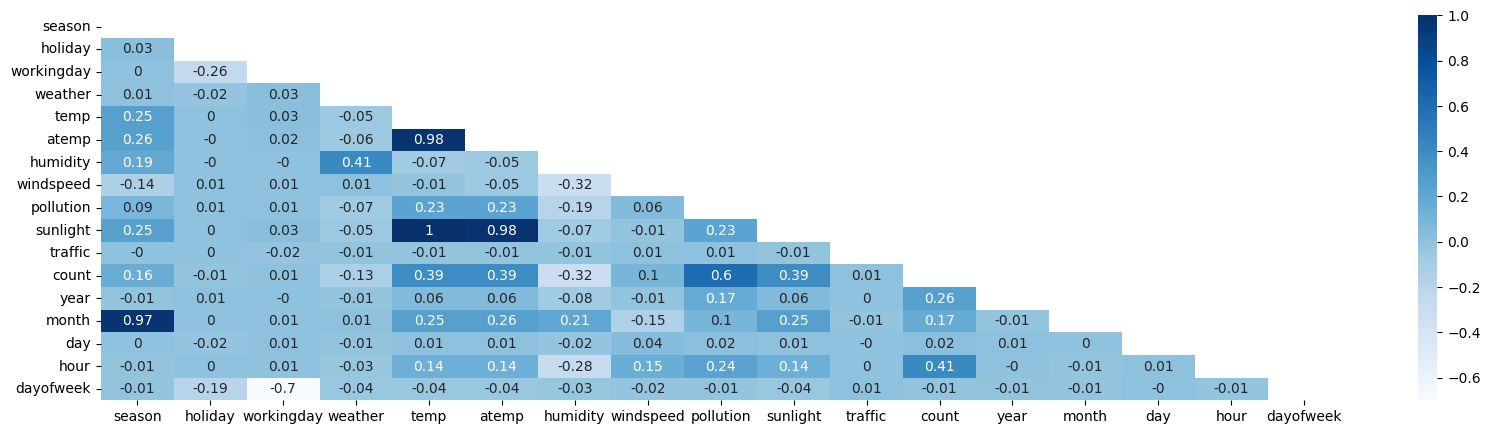

In [ ]:
def visualize_correlation_matrix(data):
    """
    Visualizes the correlation matrix of the DataFrame using a heatmap.

    Parameters:
    data (DataFrame): The DataFrame for which the correlation matrix is to be visualized.

    Returns:
    None: Displays a heatmap of the correlation matrix.
    """
    # Calculate the correlation matrix
    corr_mat = data.corr().round(2)

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))

    # Setting up the matplotlib figure
    plt.figure(figsize=(20, 5))

    # Draw the heatmap with the mask
    sns.heatmap(corr_mat, mask=mask, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, cmap='Blues')

    # Display the plot
    plt.show()

visualize_correlation_matrix(df)

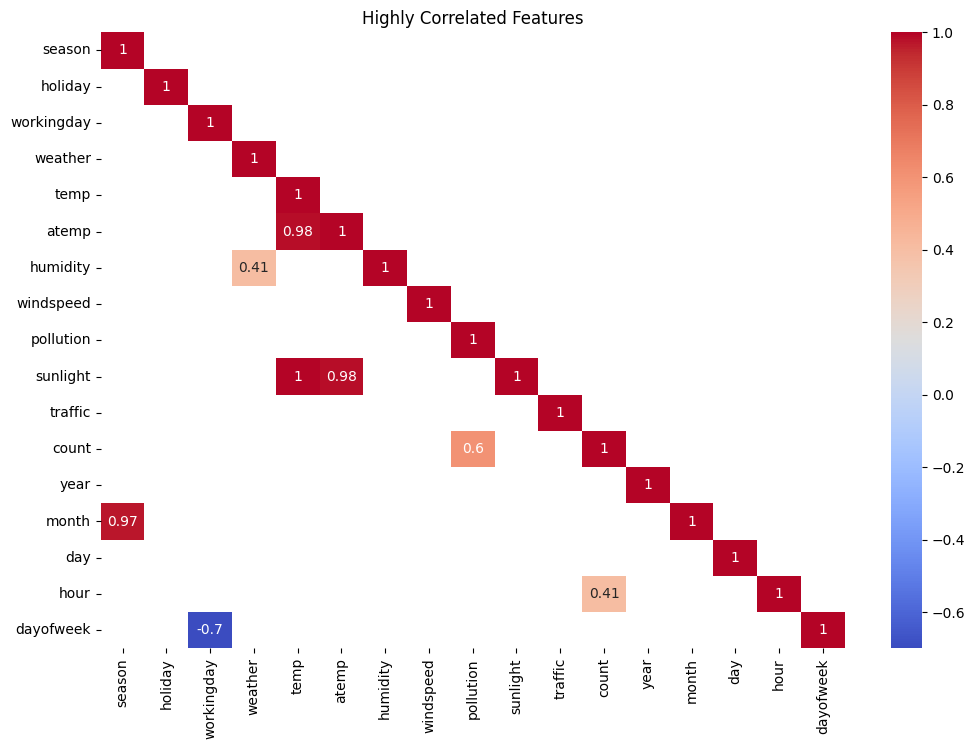

In [ ]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set a threshold to identify highly correlated features (e.g., above 0.5 or below -0.5)
threshold = 0.4

# Filter the correlation matrix
high_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Mask to hide the upper triangle of the symmetric correlation matrix
mask = pd.DataFrame(high_corr).isnull()
for i in range(mask.shape[0]):
    mask.iloc[i, i+1:] = True

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', mask=mask)
plt.title('Highly Correlated Features')
plt.show()


Distribution of Variables


Relationship between features and target


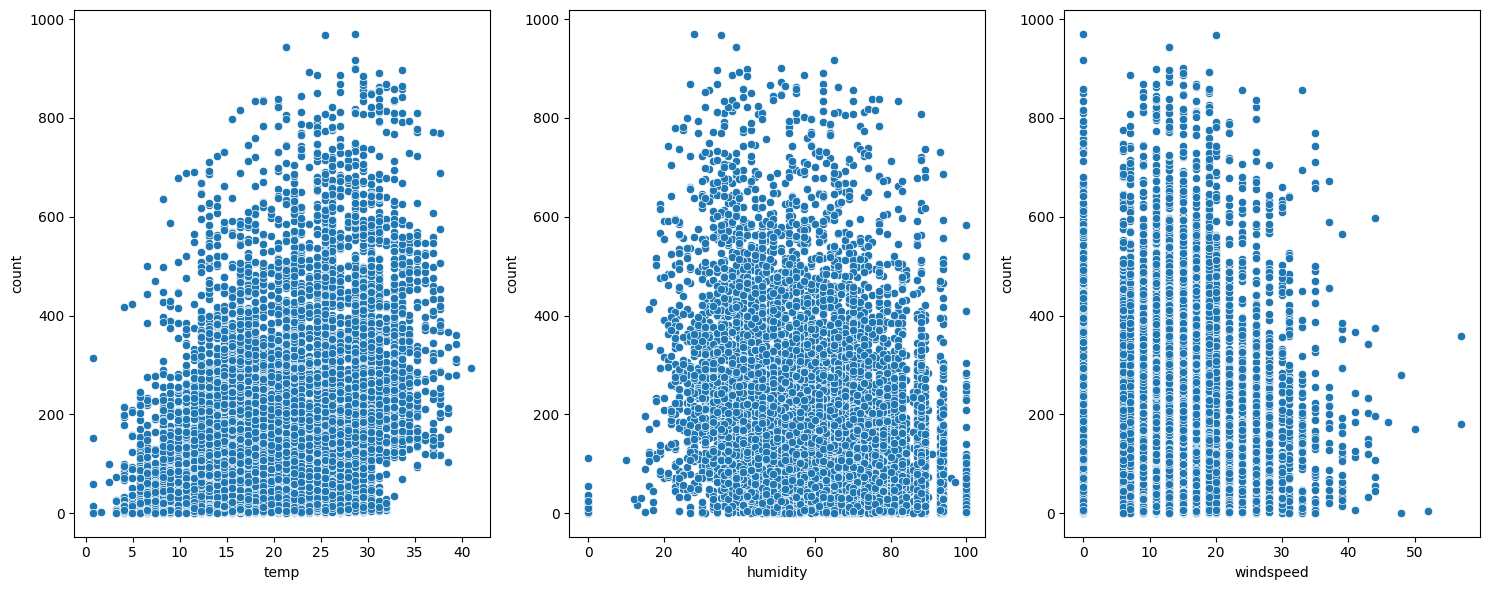

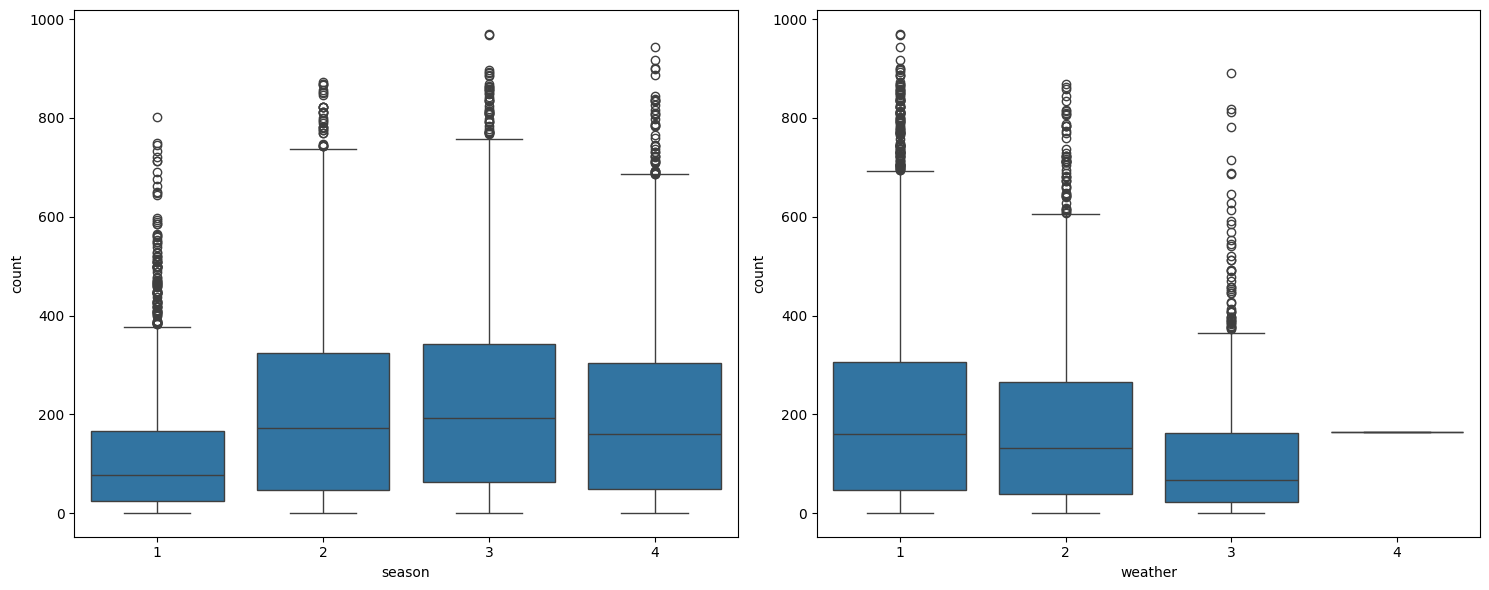

In [ ]:
# Scatter plot for continuous variables
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='temp', y='count', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='humidity', y='count', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='count', data=df)
plt.tight_layout()
plt.show()

# Box plots for categorical variables
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='season', y='count', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='weather', y='count', data=df)
plt.tight_layout()
plt.show()


These scatter plots does not show any clear/linear relationship and maybe its infulenced by other factors,we will try creating new feature-Comfortable weather that might capture combined effects or specific condtions that can be helpful
---
in the season and weather wee see that the boxplots are normal and we should just consider removing the outliers (weather number 4 got 1 sample and we should take care of that too)



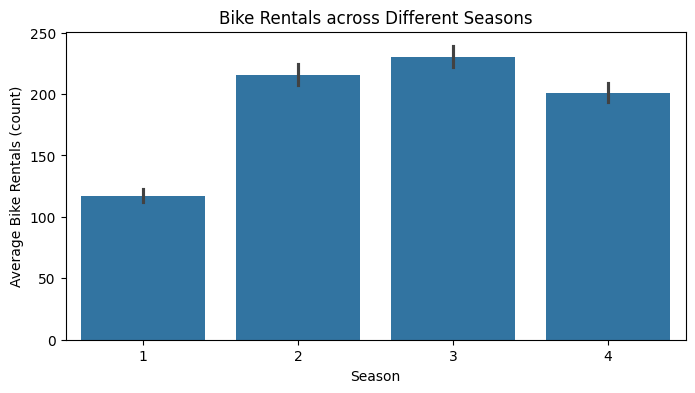

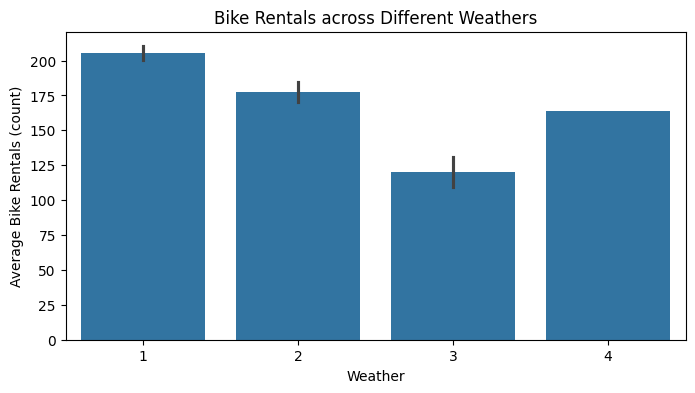

In [ ]:

categorical_features = ['season', 'weather']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df[feature], y=df['count'])
    plt.title(f'Bike Rentals across Different {feature.capitalize()}s')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Average Bike Rentals (count)')
    plt.show()


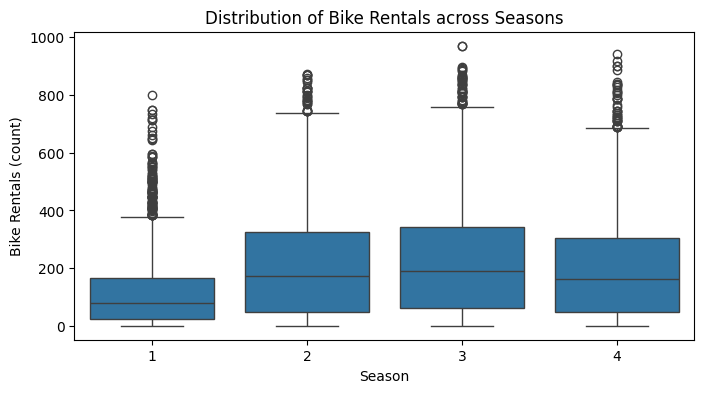

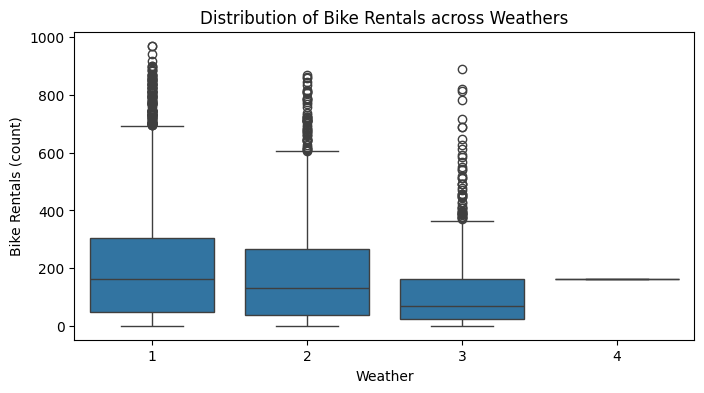

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], y=df['count'])
    plt.title(f'Distribution of Bike Rentals across {feature.capitalize()}s')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Bike Rentals (count)')
    plt.show()


In [ ]:
print(df[df['weather'] == 4].shape[0])
print(df[df['weather'] == 4]['count'])

 #we have only one sample of weather 4 and it got count of 164 bike rentals

1
6484    164
Name: count, dtype: int64


## **Data Preproccing**


**After Analyzing all the components of weather Now lets create comfortable weather feature- moderate temprature and low humidity and windspeed, weather-1 clear partly cloudy,with normal sunlight**

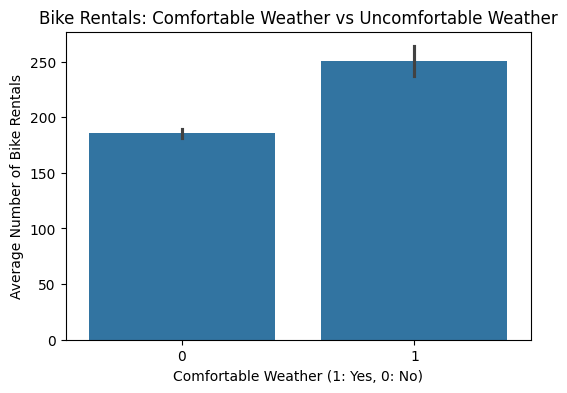

In [ ]:
temp_comfortable_low, temp_comfortable_high = df['temp'].quantile([0.25, 0.75])
humidity_comfortable = df['humidity'].quantile(0.60)  # Below 60th percentile
windspeed_comfortable = df['windspeed'].quantile(0.60)  # Below 60th percentile
sunlight_comfortable = df['sunlight'].quantile(0.40)  # Above 40th percentile, if sunlight is a measure of brightness

df['comfortable_weather'] = ((df['weather'] == 1) &
                             (df['temp'] >= temp_comfortable_low) &
                             (df['temp'] <= temp_comfortable_high) &
                             (df['humidity'] <= humidity_comfortable) &
                             (df['windspeed'] <= windspeed_comfortable) &
                             (df['sunlight'] >= sunlight_comfortable)).astype(int)

plt.figure(figsize=(6, 4))
sns.barplot(x='comfortable_weather', y='count', data=df)
plt.title('Bike Rentals: Comfortable Weather vs Uncomfortable Weather')
plt.xlabel('Comfortable Weather (1: Yes, 0: No)')
plt.ylabel('Average Number of Bike Rentals')
plt.show()



In [ ]:

# making new features that are specific for each time type
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


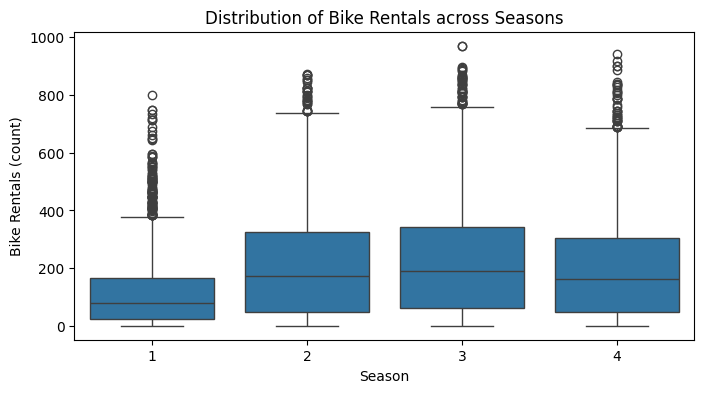

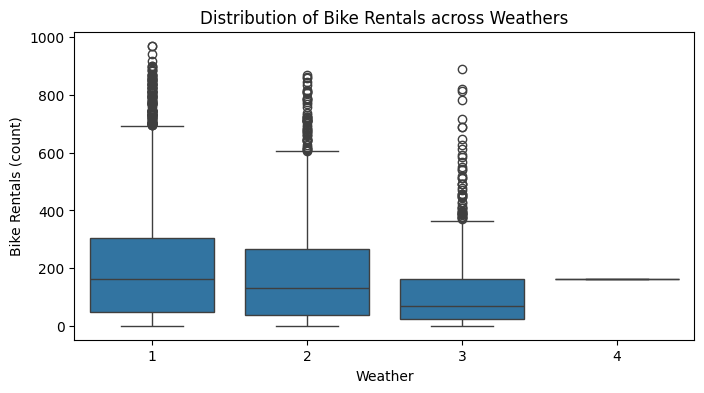

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature], y=df['count'])
    plt.title(f'Distribution of Bike Rentals across {feature.capitalize()}s')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Bike Rentals (count)')
    plt.show()

In [ ]:

cleaned_df = pd.DataFrame()

for category in df['weather'].unique():
    category_df = df[df['weather'] == category]
    category_df_cleaned = remove_outliers(category_df, 'count')
    cleaned_df = pd.concat([cleaned_df, category_df_cleaned])
for category in df['season'].unique():
    category_df = df[df['season'] == category]
    category_df_cleaned = remove_outliers(category_df, 'count')
    cleaned_df = pd.concat([cleaned_df, category_df_cleaned])




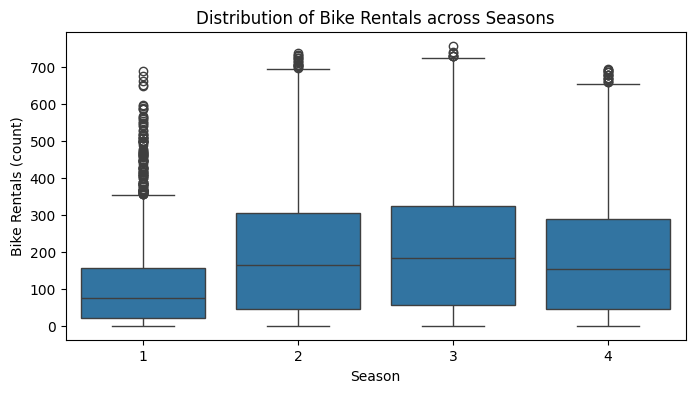

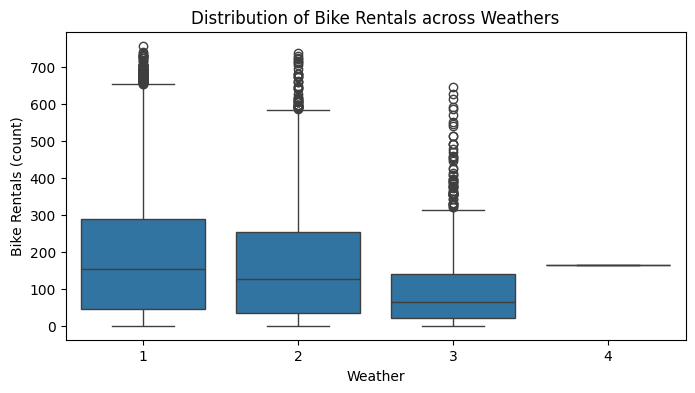

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=cleaned_df[feature], y=cleaned_df['count'])
    plt.title(f'Distribution of Bike Rentals across {feature.capitalize()}s')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Bike Rentals (count)')
    plt.show()



Training


In [ ]:


X = cleaned_df.drop(['count','datetime'], axis=1)
y = cleaned_df['count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 756.1025038727959
Mean Absolute Error: 14.874845717884131
R^2 Score: 0.9706368934379876


Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_best)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_best)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_best)}")



Fitting 3 folds for each of 216 candidates, totalling 648 fits
{'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 747.9536898902319
Mean Absolute Error: 14.800877175940023
R^2 Score: 0.9709533511829342


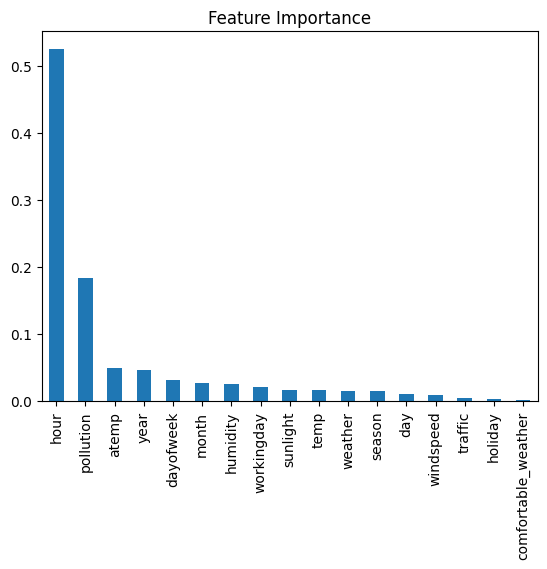

In [ ]:
importances = best_rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [ ]:

# Hour - Sine and Cosine Transformation
cleaned_df['hour_sin'] = np.sin(cleaned_df['hour'] * (2. * np.pi / 24))
cleaned_df['hour_cos'] = np.cos(cleaned_df['hour'] * (2. * np.pi / 24))

# Pollution - Logarithmic Transformation
cleaned_df['pollution_log'] = np.log(cleaned_df['pollution'] + 1)  # Adding 1 to avoid log(0)

# Atemp - Square Root Transformation (as an example)
cleaned_df['atemp_sqrt'] = np.sqrt(cleaned_df['atemp'])

# Day of the Week - Sine and Cosine Transformation
cleaned_df['dayofweek_sin'] = np.sin(cleaned_df['dayofweek'] * (2. * np.pi / 7))
cleaned_df['dayofweek_cos'] = np.cos(cleaned_df['dayofweek'] * (2. * np.pi / 7))

# Humidity - Logarithmic Transformation (if skewed)
cleaned_df['humidity_log'] = np.log(cleaned_df['humidity'] + 1)


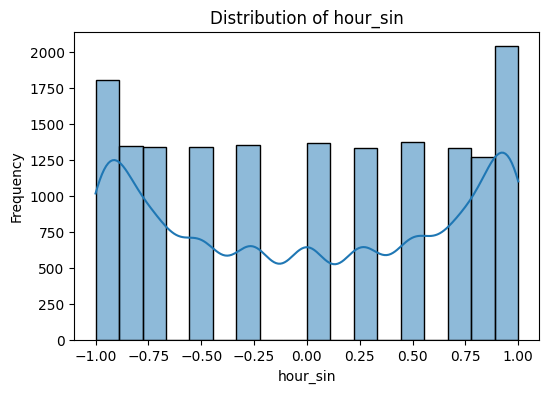

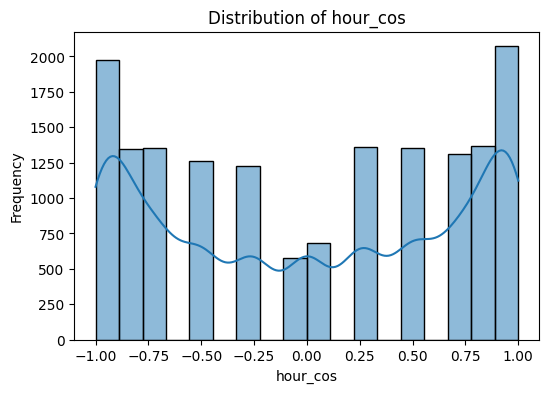

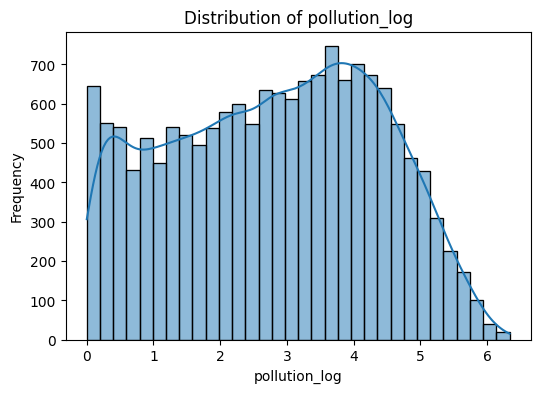

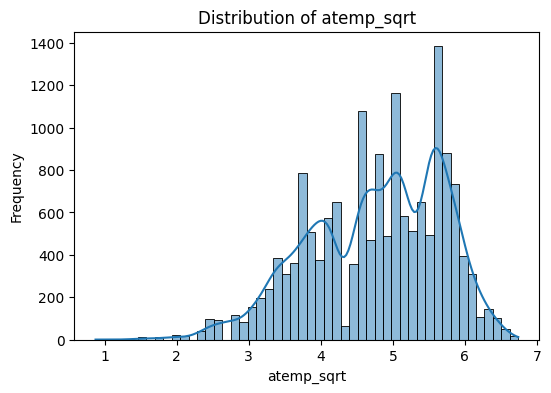

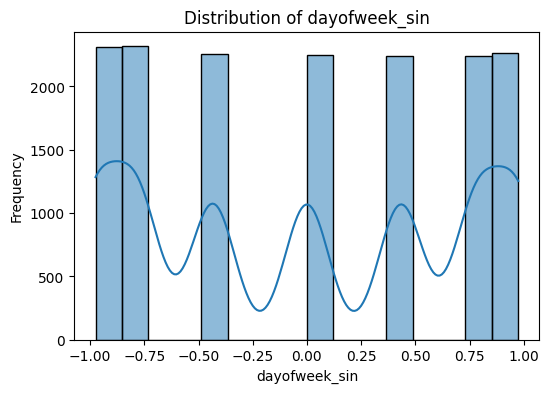

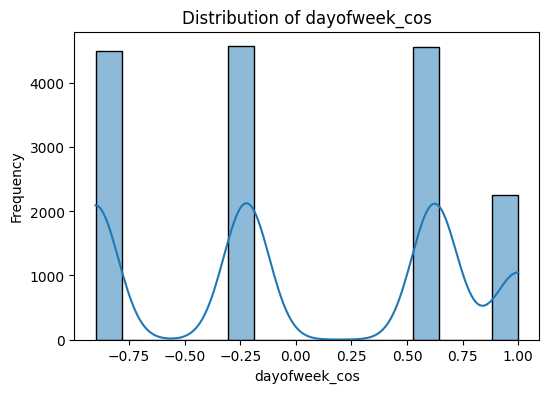

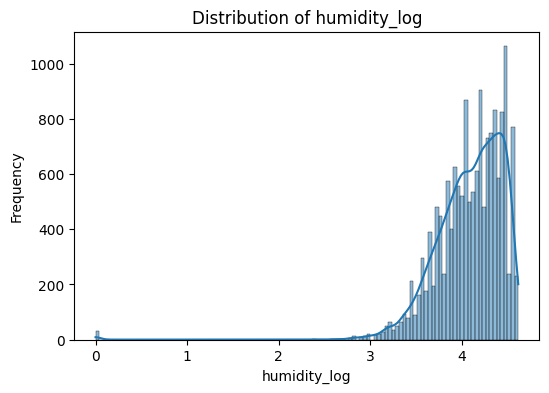

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of transformed features
transformed_features = ['hour_sin', 'hour_cos', 'pollution_log', 'atemp_sqrt', 'dayofweek_sin', 'dayofweek_cos', 'humidity_log']

# Plotting distributions of transformed features
for feature in transformed_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(cleaned_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features and target variable
X = cleaned_df.drop(['count','datetime'], axis=1)  # Include all original and transformed features
y = cleaned_df['count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)
# rf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf.predict(X_test)
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 756.1025038727959
Mean Absolute Error: 14.874845717884131
R^2 Score: 0.9706368934379876


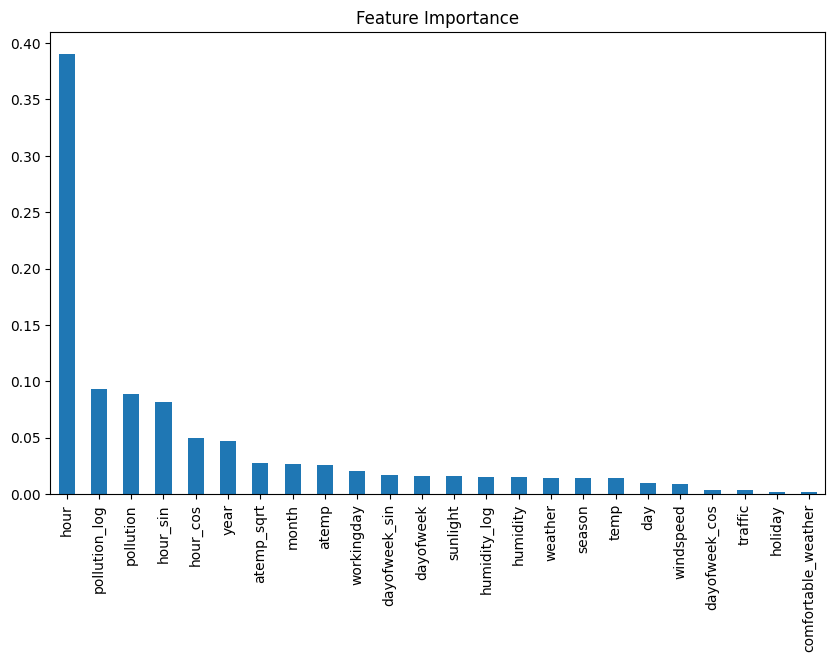

In [ ]:
importances = best_rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plot
plt.figure(figsize=(10, 6))
forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()



In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize AdaBoost Regressor
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                            n_estimators=100, random_state=42)

# Train the model
ada_reg.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_reg.predict(X_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_pred_ada)
mae_ada = mean_absolute_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

print(f"AdaBoost - Mean Squared Error: {mse_ada}")
print(f"AdaBoost - Mean Absolute Error: {mae_ada}")
print(f"AdaBoost - R^2 Score: {r2_ada}")
# Assuming best_ada is your tuned AdaBoost model




AdaBoost - Mean Squared Error: 426.5642317380353
AdaBoost - Mean Absolute Error: 5.855793450881612
AdaBoost - R^2 Score: 0.9834344537573783


In [ ]:
importances = ada_reg.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(10, 6))
forest_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.show()


In [ ]:
# Set a threshold for feature importance
threshold = 0.01  # Example threshold
important_features = forest_importances[forest_importances > threshold]

# Selecting columns based on importance threshold
selected_columns = important_features.index.tolist()
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]


In [ ]:
# Retrain the AdaBoost model with reduced features
ada_reg_reduced = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                    n_estimators=100, random_state=42)
ada_reg_reduced.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred_reduced = ada_reg_reduced.predict(X_test_selected)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Reduced AdaBoost - Mean Squared Error: {mse_reduced}")
print(f"Reduced AdaBoost - Mean Absolute Error: {mae_reduced}")
print(f"Reduced AdaBoost - R^2 Score: {r2_reduced}")


Reduced AdaBoost - Mean Squared Error: 418.46284634760707
Reduced AdaBoost - Mean Absolute Error: 6.01007556675063
Reduced AdaBoost - R^2 Score: 0.9837490696213658


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# {'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
# Best parameters: {'base_estimator__max_depth': 15, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 300}

# Define the parameter grid
param_grid = {
    # 'n_estimators': [100,200,300],
    # 'learning_rate': [0.5,1.0],
    # 'loss':['linear'],
    # 'base_estimator__max_depth': [15,20,30]
'base_estimator__max_depth': [15], 'learning_rate': [1.0], 'loss': ['linear'], 'n_estimators': [300]}


# Create AdaBoost with a DecisionTreeRegressor as its base estimator
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada_reg, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Evaluate on the test set
best_ada = grid_search.best_estimator_
y_pred_best = best_ada.predict(X_test)
mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print(f"Optimized AdaBoost - Mean Squared Error: {mse}")
print(f"Optimized AdaBoost - Mean Absolute Error: {mae}")
print(f"Optimized AdaBoost - R^2 Score: {r2}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'base_estimator__max_depth': 15, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 300}
Best score (negative MSE): 0.9581789509917941
Optimized AdaBoost - Mean Squared Error: 417.5276917070865
Optimized AdaBoost - Mean Absolute Error: 7.036400631897764
Optimized AdaBoost - R^2 Score: 0.9837853861858804


**Evaluating Model Performance**

Mean Squared Error: 417.5276917070865
Mean Absolute Error: 7.036400631897764
R^2 Score: 0.9837853861858804


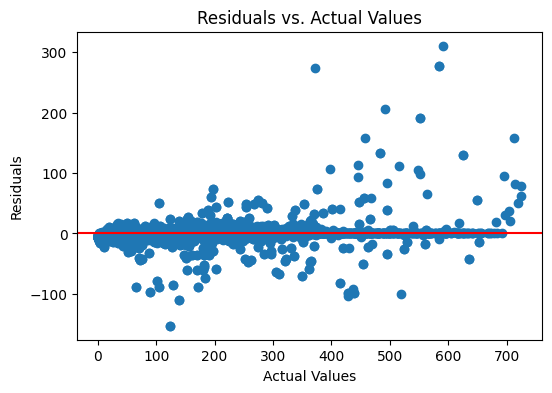

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = best_ada.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals)
plt.title('Residuals vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


**Feature Importance Analysis**

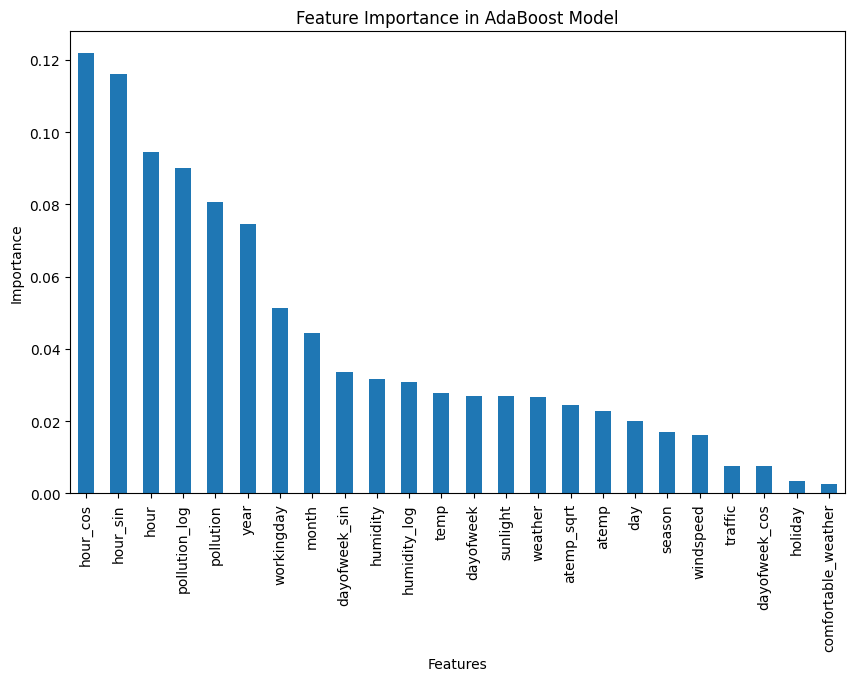

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the AdaBoost model
importances = best_ada.feature_importances_
feature_names = X_train.columns
ada_importances = pd.Series(importances, index=feature_names)

# Plot
plt.figure(figsize=(10, 6))
ada_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance in AdaBoost Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
# Set a threshold for feature importance
threshold = 0.01  # Example threshold
important_features = ada_importances[ada_importances > threshold]

# Selecting columns based on importance threshold
selected_columns = important_features.index.tolist()
X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

# Retrain the AdaBoost model with reduced features
ada_reg_reduced = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                    n_estimators=100, random_state=42)
ada_reg_reduced.fit(X_train_selected, y_train)

# Make predictions and evaluate the model
y_pred_reduced = ada_reg_reduced.predict(X_test_selected)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
mae_reduced = mean_absolute_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Reduced AdaBoost - Mean Squared Error: {mse_reduced}")
print(f"Reduced AdaBoost - Mean Absolute Error: {mae_reduced}")
print(f"Reduced AdaBoost - R^2 Score: {r2_reduced}")


Reduced AdaBoost - Mean Squared Error: 418.46284634760707
Reduced AdaBoost - Mean Absolute Error: 6.01007556675063
Reduced AdaBoost - R^2 Score: 0.9837490696213658


**PCA**

In [ ]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# # Standardize the data
# scaler = StandardScaler()

# # Apply PCA
# pca = PCA(n_components=0.95)  # Keep 95% of variance

# # Create a pipeline
# pipeline = Pipeline([('scaler', scaler), ('pca', pca)])

# # Fit and transform the data
# X_train_pca = pipeline.fit_transform(X_train)
# X_test_pca = pipeline.transform(X_test)

# # Train the model on PCA-transformed data
# model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
#                           n_estimators=100, random_state=42)
# model.fit(X_train_pca, y_train)

# # Evaluate the model
# y_pred_pca = model.predict(X_test_pca)
# mse_pca = mean_squared_error(y_test, y_pred_pca)
# mae_pca = mean_absolute_error(y_test, y_pred_pca)
# r2_pca = r2_score(y_test, y_pred_pca)

# print(f"PCA Model - Mean Squared Error: {mse_pca}")
# print(f"PCA Model - Mean Absolute Error: {mae_pca}")
# print(f"PCA Model - R^2 Score: {r2_pca}")

# We got PCA Model - Mean Squared Error: 1806.375
# PCA Model - Mean Absolute Error: 13.250314861460957
# PCA Model - R^2 Score: 0.9298497474293796
# and this shows that pca didnt really help or improve our model so we just will show the attempt here
